In [8]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io
import os

(92287,)


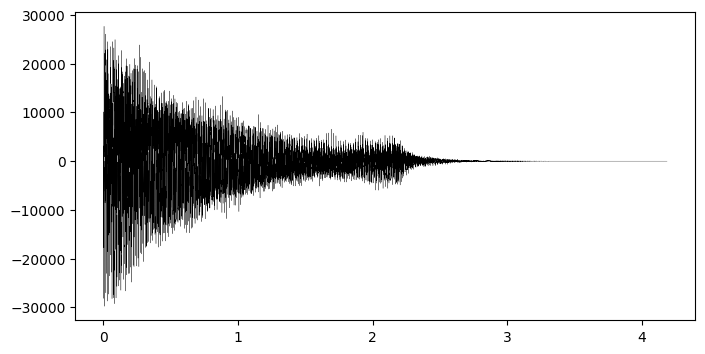

In [20]:

def filter_n_decimate(filterLength_smp : int, numBands : int, inputSignal : np.array):
    """
    args :
        - filterLength : [int]
            Digital filter length, in samples
        - numBands : [int]
            Number of frequency channels in which the signal is to be separated
        - inputSignal : [(1, N) np.array]
            Input signal 
    returns :
        - outputSignals : [numBands, N) np.array]
            Output signal"""
    signalLength_smp = np.shape(inputSignal)[0] #Input signal length
    filteredSignal = np.zeros((signalLength_smp, numBands)) #initializing the output signal

    for i in range(numBands):
        filteredSignal[:,i] = inputSignal

    filters = np.zeros((filterLength_smp, numBands))

    n = np.arange(filterLength_smp)
    base_filter = np.zeros(filterLength_smp)
    for i in range(filters):
        filters[i] = base_filter
    
    outputSignal = filteredSignal[::numBands]
    return outputSignal


sr_hz, x = scipy.io.wavfile.read(os.path.join("..", "Data", "Piano_test", "33.wav"))

y = filter_n_decimate(15, 4, x)


print(np.shape(x))
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(x))/sr_hz, x, 'k', linewidth = .2)
plt.show()

In [7]:
help(scipy.io.wavfile.read)

Help on function read in module scipy.io.wavfile:

read(filename, mmap=False)
    Open a WAV file.
    
    Return the sample rate (in samples/sec) and data from an LPCM WAV file.
    
    Parameters
    ----------
    filename : string or open file handle
        Input WAV file.
    mmap : bool, optional
        Whether to read data as memory-mapped (default: False).  Not compatible
        with some bit depths; see Notes.  Only to be used on real files.
    
        .. versionadded:: 0.12.0
    
    Returns
    -------
    rate : int
        Sample rate of WAV file.
    data : numpy array
        Data read from WAV file. Data-type is determined from the file;
        see Notes.  Data is 1-D for 1-channel WAV, or 2-D of shape
        (Nsamples, Nchannels) otherwise. If a file-like input without a
        C-like file descriptor (e.g., :class:`python:io.BytesIO`) is
        passed, this will not be writeable.
    
    Notes
    -----
    Common data types: [1]_
    
    ================